# DATA MINING

## Brief summary of document
This document describes the analysis of a dataset aimed at predicting epitopes for Trypanosoma cruzi (T. cruzi), a parasite causing Chagas’ disease.

## Exploratory Data Analysis and Data Pre-processing


In [1]:
## Import modules and functions

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GroupShuffleSplit, GridSearchCV, train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score, accuracy_score
from imblearn.over_sampling import SMOTE
import pickle
import warnings
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [4]:
df = pd.read_csv('/Users/Downloads/df.csv',sep=';')

In [5]:
df

,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_epitope_id,Info_nPos,Info_nNeg,Info_cluster,Class,...,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279,feat_esm1b_1280
0,XP_809948.1:15,5693,XP_809948.1,218,E,276453,1,0,18,1,...,-0.177248,-0.275432,0.175780,-2.618115,-0.306478,0.248409,-0.144645,-0.163276,0.101016,0.571763
1,XP_809948.1:15,5693,XP_809948.1,219,E,276453,1,0,18,1,...,-0.089673,-0.258615,0.063662,-2.660741,-0.227916,0.233011,-0.143840,-0.119282,0.146848,0.507656
2,XP_809948.1:15,5693,XP_809948.1,220,D,276453,1,0,18,1,...,-0.037816,-0.205189,0.220458,-2.610207,-0.156326,0.231606,0.251916,0.077030,0.326192,0.071661
3,XP_809948.1:15,5693,XP_809948.1,221,N,276453,1,0,18,1,...,-0.249216,-0.211748,-0.130716,-2.598186,-0.130838,-0.026848,0.167203,-0.394126,0.222274,0.376358
4,XP_809948.1:15,5693,XP_809948.1,222,E,276453,1,0,18,1,...,-0.039318,-0.250912,-0.093870,-2.414023,-0.253500,0.118345,-0.160718,-0.076750,0.448067,0.326883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49601,XP_812261.1:6,5693,XP_812261.1,94,I,300245,0,1,157,-1,...,0.472350,-0.247337,-0.309765,0.190045,-0.181312,-0.058894,0.025527,-0.083306,-0.002887,0.077993
49602,XP_804477.1:18,5693,XP_804477.1,370,D,"373881,390461,251259,388295","0,0,0,0","1,1,1,1",35,-1,...,0.001537,-0.036722,0.038110,-2.018414,-0.437113,-0.024533,0.138691,-0.172405,0.448034,-0.251285
49603,XP_813734.1:4,5693,XP_813734.1,112,G,"356379,323345","0,0","1,1",24,-1,...,-0.208069,-0.180131,-0.014111,-1.502984,-0.317111,0.012365,0.132795,-0.324255,0.145919,0.072326
49604,XP_812183.1:6,5693,XP_812183.1,144,G,"301626,297474","0,0","1,1",18,-1,...,-0.275757,-0.179628,0.013488,-1.108764,-0.278636,0.388318,-0.034176,-0.226525,0.577863,0.172114


In [6]:

#### Data Overview

In [7]:
# Total number of columns that fall into each category

int_count = 0
float_count = 0
string_count = 0
for column in df.columns:
    if df[column].dtype == 'int64':  
        int_count += 1
    elif df[column].dtype == 'float64': 
        float_count += 1
    elif df[column].dtype == 'object':
        string_count +=1
print("Number of integer columns:", int_count)
print("Number of float columns:", float_count)
print("Number of string columns:", string_count)

Number of integer columns: 4
Number of float columns: 1281
Number of string columns: 6


In [8]:
# Columns in integer category

int_columns = []  
for column in df.columns:
    if df[column].dtype == 'int64': 
        int_columns.append(column)  

print("int columns:", int_columns)

int columns: ['Info_organism_id', 'Info_pos', 'Info_cluster', 'Class']


In [9]:
# Columns in float category

int_columns = []  
for column in df.columns:
    if df[column].dtype == 'object': 
        int_columns.append(column)  

print("int columns:", int_columns)


int columns: ['Info_PepID', 'Info_protein_id', 'Info_AA', 'Info_epitope_id', 'Info_nPos', 'Info_nNeg']


In [10]:
# Group number in 'Info_cluster' column

unique_info_clusters = df['Info_PepID'].nunique()    
print("Number of unique values in 'Info_cluster':", unique_info_clusters)

Number of unique values in 'Info_cluster': 4208


In [11]:
# Overview of Class column
print(df.info())
print(df['Class'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49606 entries, 0 to 49605
Columns: 1291 entries, Info_PepID to feat_esm1b_1280
dtypes: float64(1281), int64(4), object(6)
memory usage: 488.6+ MB
None
Class
-1    48797
 1      809
Name: count, dtype: int64


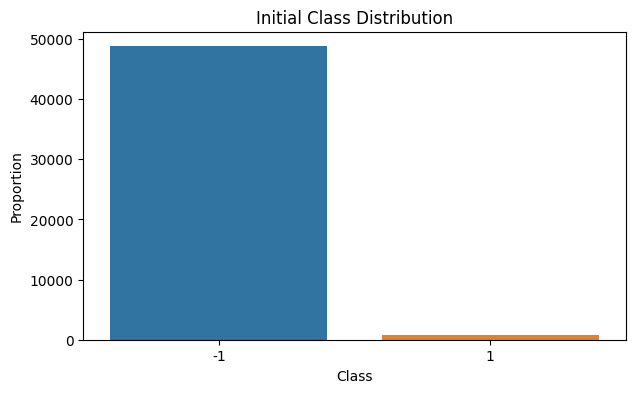

In [12]:

# Plotting Class distribution
class_counts = df['Class'].value_counts()
plt.figure(figsize=(7, 4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Initial Class Distribution')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()



In [13]:
# Duplicates
duplicates = df.duplicated()

print("Number of duplicates:", duplicates.sum())

Number of duplicates: 0


No duplicates in our dataset.

In [14]:
# Checking the proportion of each Class within each 'Info_cluster' group

class_balance = df.groupby('Info_cluster')['Class'].value_counts(normalize=True)

# Print class balance within each Info_cluster
print(class_balance)

# Count the number of unique class balances
num_unique_class_balances = class_balance.value_counts().shape[0]
print("Number of unique class balances:", num_unique_class_balances)

Info_cluster  Class
7             -1       1.0
8             -1       1.0
9             -1       1.0
10            -1       1.0
11            -1       1.0
                      ... 
279           -1       1.0
280           -1       1.0
281           -1       1.0
282           -1       1.0
283           -1       1.0
Name: proportion, Length: 298, dtype: float64
Number of unique class balances: 67


### unique class balance in info columns to analyse the variability in our class distributions across:

1  in 'Info_PepID'
2  in 'Info_organism_id'
65 in 'Info_protein_id'
76 in 'Info_pos'
35 in 'Info_AA'
1  in 'Info_epitope_id'
1  in 'Info_nPos'
1  in 'Info_nNeg'
1  in 'Info_nNeg'
57 in 'nfo_cluster' 



In [15]:
# Separating columns  to avoid the destruction of relevant informations

# Info columns
info_columns = [col for col in df.columns if col.startswith("Info")]

# Feature columns
feat_columns = [col for col in df.columns if col.startswith("feat")]

# Concatenate 'Info_cluster' and 'Class' with Feature columns

df_three = pd.concat([df[['Info_cluster', 'Class']], df[feat_columns]], axis=1)
feat_info_class_columns = feat_info_class_columns = df_three.columns

print("Number of Info columns':", len(info_columns))
print("Number of Feature columns':", len(feat_columns))
print("Info_cluster' and 'Class' with Feature columns:", len(feat_info_class_columns))

Number of Info columns': 9
Number of Feature columns': 1281
Info_cluster' and 'Class' with Feature columns: 1283


In [16]:
#Dataframe with Info_cluster,Class and feature columns

df_fic = pd.concat([df[['Info_cluster', 'Class']], df[feat_columns]], axis=1)
df_feat = df[feat_columns]
fic_columns = df_three.columns.tolist()

In [17]:
# Splitting the data into train and test sets based on Info_cluster using GroupShuffleSplit

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=29)

for train_index, test_index in gss.split(df_fic, groups=df_three['Info_cluster']):
    df_train = df_fic.iloc[train_index]
    df_test = df_fic.iloc[test_index]
    
# Class and info_cluster columns together in one dataframe
df_train_info_class = df_train[['Info_cluster', 'Class']]

# Dropping 'Info_cluster' and 'Class' columns to create feature dataframes
df_train_feat = df_train.drop(['Info_cluster', 'Class'], axis=1)

In [18]:
# Missing values in the 'Class' column
missing_values_class = df_train['Class'].isnull().sum()


print("Number of missing values in the 'Class' column:", missing_values_class)

Number of missing values in the 'Class' column: 0


In [19]:
# Counting missing values in Feature columns
columns_with_missing_values_count = df_train.isnull().any().sum()
total_missing_values = df_train.isnull().sum().sum()

print("Number of columns with missing values:", columns_with_missing_values_count)
print("Total number of missing values:", total_missing_values)

Number of columns with missing values: 1281
Total number of missing values: 126027


In [20]:
#Percentage of missing values per feature column
missing_percentage = (df_train_feat.isna().sum() / len(df_feat)) * 100
missing_percentage_sorted = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

print("Columns with missing values and their percentages:")
print(missing_percentage_sorted)

Columns with missing values and their percentages:
feat_esm1b_148     72.799661
feat_esm1b_177      0.149176
feat_esm1b_902      0.149176
feat_esm1b_1018     0.149176
feat_esm1b_576      0.149176
                     ...    
feat_esm1b_823      0.129017
feat_esm1b_1131     0.129017
feat_esm1b_778      0.129017
feat_esm1b_494      0.129017
feat_esm1b_257      0.122969
Length: 1281, dtype: float64


##### All feature columns have missing values as missing values are seen in all 290 colums.

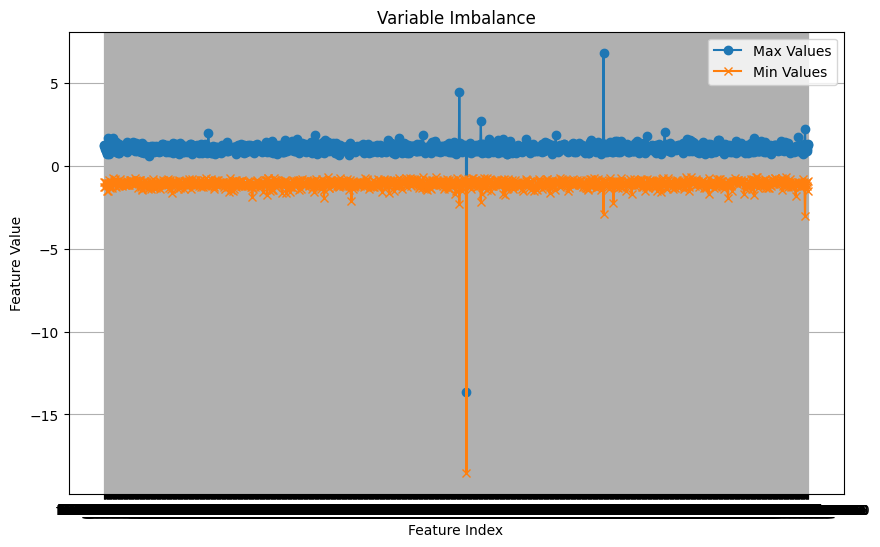

In [21]:
# Visualising the variable imbalance 

max_values = df_train_feat.max()
min_values = df_train_feat.min()
plt.figure(figsize=(10, 6))
plt.plot(max_values, label='Max Values', marker='o')
plt.plot(min_values, label='Min Values', marker='x')
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
plt.title('Variable Imbalance')
plt.legend()
plt.grid(True)
plt.show()




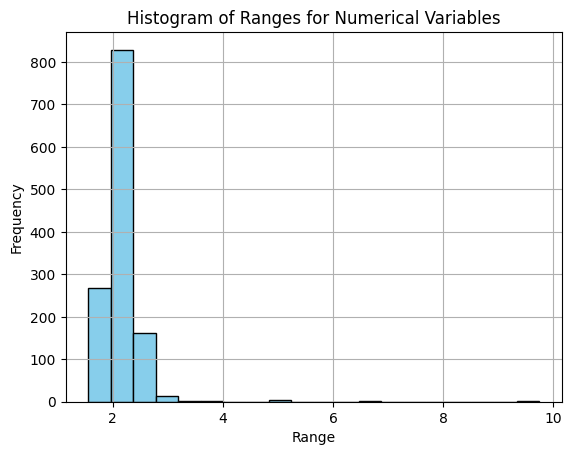

In [22]:
#  Visualising the variable range distribution
ranges = df_train_feat.max() - df_train_feat.min()

plt.hist(ranges, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Range')
plt.ylabel('Frequency')
plt.title('Histogram of Ranges for Numerical Variables')
plt.grid(True)
plt.show()



####  Handling The missing Values

In [23]:
#Multiple Imputation for 'feat_esm1b_148' as it's missing more than 75% of data 

imputer = IterativeImputer(random_state=29)

# Reshape  'feat_esm1b_148' to a 2D array
feat_esm1b_148_column_2d = df_train_feat['feat_esm1b_148'].values.reshape(-1, 1)

imputed_feat_esm1b_148_column = imputer.fit_transform(feat_esm1b_148_column_2d)

# Convert the imputed array back to a Series
imputed_feat_esm1b_148_column = pd.Series(imputed_feat_esm1b_148_column.flatten(), name='feat_esm1b_148')

print("Number of missing values after imputation in 'feat_esm1b_148' column:")
print(imputed_feat_esm1b_148_column.isnull().sum())


Number of missing values after imputation in 'feat_esm1b_148' column:
0


In [24]:
# Simple imputation for remaining columns missing less than 25% of data using median as the data is skewed

np.random.seed(29)
imputer = SimpleImputer(strategy='median')
df_imputed_feat = pd.DataFrame(imputer.fit_transform(df_train_feat.drop(columns=['feat_esm1b_148'])), columns=df_train_feat.drop(columns=['feat_esm1b_148']).columns)
n_clusters = 50 
kmeans = KMeans(n_clusters=n_clusters, n_init=10)
clusters = kmeans.fit_predict(df_imputed_feat)

df_imputed_feat['feat_esm1b_148'] = imputed_feat_esm1b_148_column

In [25]:
#Checking for null values in our dataframe to check if missing values were handled well.

print(df_imputed_feat.isnull().sum().sum())

0


### Outlier Detection

In [26]:
X = df_imputed_feat.values
feature_names = df_imputed_feat.columns  

# Initialize the Isolation Forest model with feature names
iso_forest = IsolationForest(n_estimators=100, contamination=0.03, random_state=42)

# Fit the Isolation Forest model on the scaled data
iso_forest.fit(X)

# Predict outliers using the Isolation Forest model
outlier_scores = iso_forest.predict(X)

outliers = df_imputed_feat[outlier_scores == -1]

# Count the number of outliers
num_outliers = sum(outlier_scores == -1)
print("Number of outliers detected:", num_outliers)


Number of outliers detected: 1204


## Feature reduction


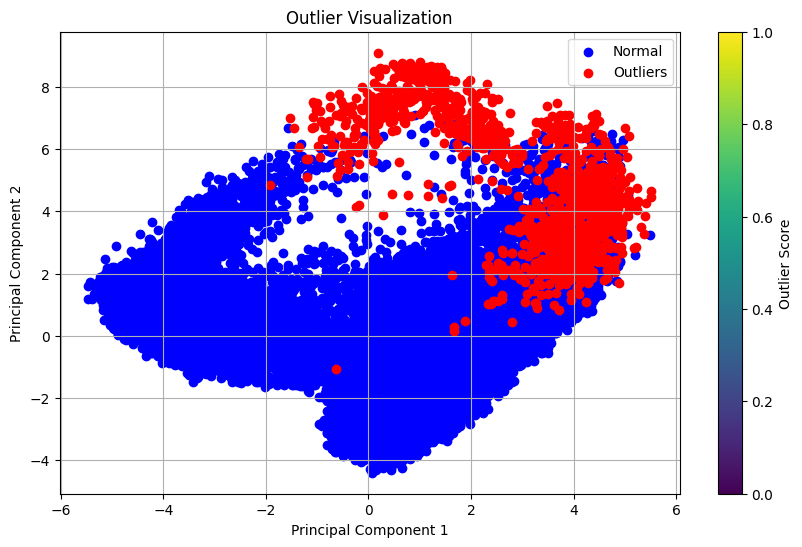

In [27]:
# Visual of outlier scores in the reduced 2D space.
pca = PCA(n_components=2) 
reduced_data = pca.fit_transform(df_imputed_feat)
plt.figure(figsize=(10, 6))

plt.scatter(reduced_data[outlier_scores != -1, 0], reduced_data[outlier_scores != -1, 1], c='blue', label='Normal')

plt.scatter(reduced_data[outlier_scores == -1, 0], reduced_data[outlier_scores == -1, 1], c='red', label='Outliers')

plt.title('Outlier Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Outlier Score')


plt.grid(True)
plt.legend()
plt.show()

#use train

#### Handling missing values 

In [28]:
cleaned_reduced_data = reduced_data [outlier_scores != -1]

In [29]:
#Comparing the reduced size for reduced data with and without outliers
reduced_data_len = len(reduced_data)
print("Number of elements in reduced_data:", reduced_data_len)

# Or using the len() function
cleaned_reduced_data_len = len(cleaned_reduced_data)
print("Number of elements in cleaned_reduced_data:", cleaned_reduced_data_len )
#umber of elements in reduced_data: 19874
#Number of elements in reduced_data: 9937

Number of elements in reduced_data: 40110
Number of elements in cleaned_reduced_data: 38906


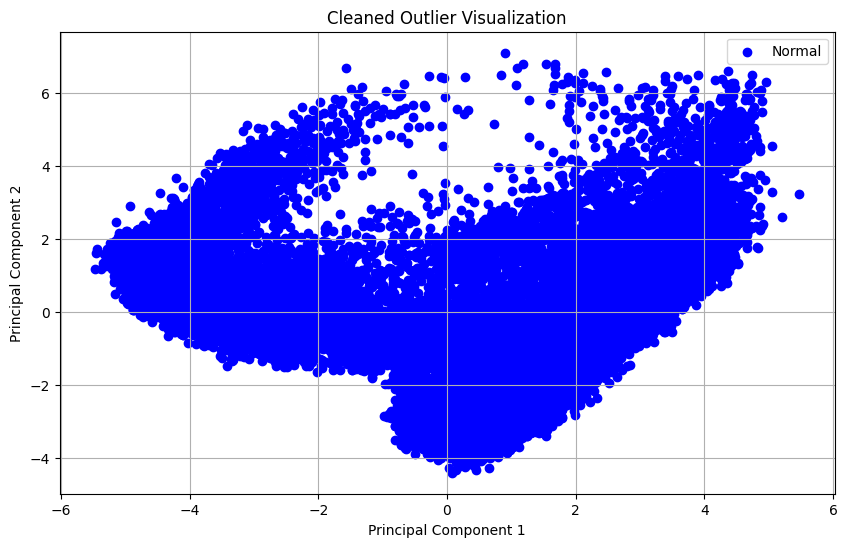

In [30]:

# Scatter plot for the cleaned reduced data
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_reduced_data[:, 0], cleaned_reduced_data[:, 1], c='blue', label='Normal')

plt.title('Cleaned Outlier Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend()
plt.show()

In [31]:
df_train_info_class.reset_index(drop= True, inplace = True)
df_imputed_fic = pd.concat([ df_train_info_class,df_imputed_feat], axis=1)

In [32]:
# Removing Outliers 
outlier_indices = outlier_scores == -1

# Removing rows with outliers from the original DataFrame
df_cleaned_fic = df_imputed_fic[~outlier_indices]

print("Shape of cleaned DataFrame after removing outliers:", df_cleaned_fic.shape)

Shape of cleaned DataFrame after removing outliers: (38906, 1283)


In [33]:
# DataFrame containing only 'Feature' columns.
df_cleaned_feat = df_cleaned_fic.drop(['Info_cluster', 'Class'], axis=1)

# DataFrame containing only 'Info_cluster' and 'Class' columns
df_cleaned_class_cluster = df_cleaned_fic[['Info_cluster', 'Class']]




In [34]:
scaler = StandardScaler()
scaled_reduct_data = scaler.fit_transform(df_cleaned_feat)

pca = PCA(n_components=0.95) 
pca_result = pca.fit_transform(scaled_reduct_data)

# Convert pca_result array to DataFrame with original column names
df_pca_feat = pd.DataFrame(data=pca_result, columns=df_cleaned_feat.columns[:pca_result.shape[1]])

print("Shape Before Reduction:", df_cleaned_feat.shape)
print("Shape of the reduced dataset after PCA:", pca_result.shape)

Shape Before Reduction: (38906, 1281)
Shape of the reduced dataset after PCA: (38906, 840)


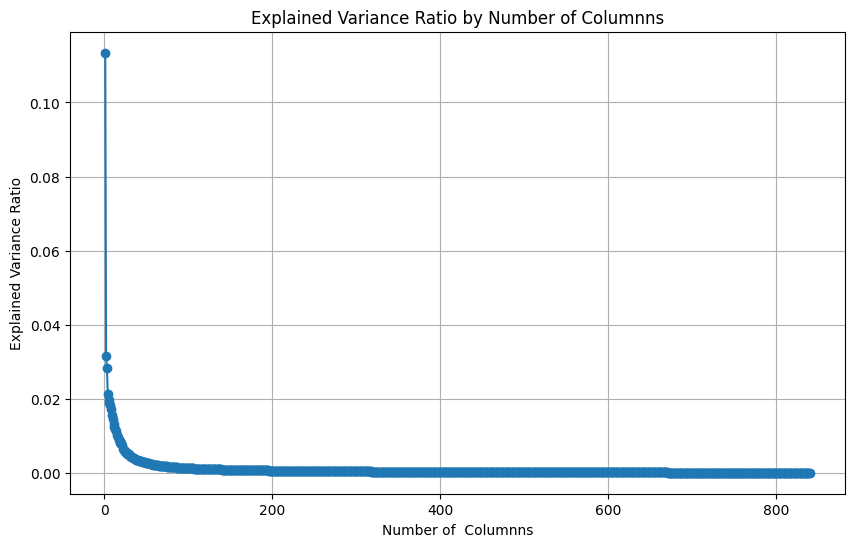

In [35]:
# Visualising Variance ratio after PCA

plt.figure(figsize=(10, 6))
plt.plot(range(1, pca_result.shape[1] + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.xlabel('Number of  Columnns')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Columnns')
plt.grid(True)
plt.show()

PCA transformed our high dimensional data into low dimensional data without lossing any signigicant information from features columns and also help in time complexity.

In [36]:
df_cleaned_class_cluster.reset_index(drop= True, inplace = True)

# Merge df_pca_feat with df_cleaned_class_cluster 
df_pca_fic = pd.concat([ df_cleaned_class_cluster , df_pca_feat], axis=1)


In [37]:
total_nan_count = df_pca_fic.isna().sum().sum()

# Print the total count of NaN values
print("Total NaN count:", total_nan_count)


Total NaN count: 0



## Data Upscaling


Counts of each class label after SMOTE resampling:
Class
 1    38350
-1    38350
Name: count, dtype: int64


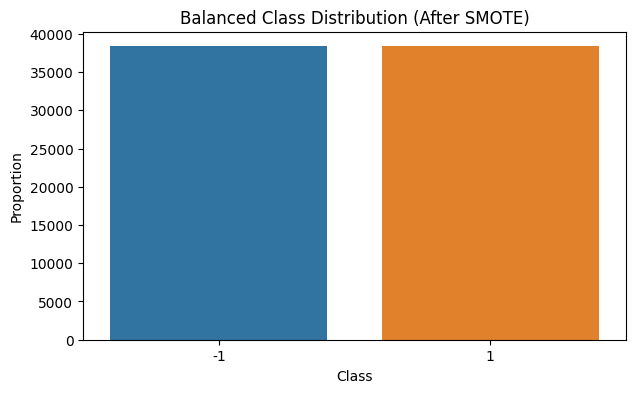

In [38]:
# Resampling 

smote_resampler = SMOTE()
X_resampled, y_resampled = smote_resampler.fit_resample(df_pca_fic.drop(columns='Class'), df_pca_fic['Class'])

# Convert the resampled data back to a DataFrame
df_resampled_feat = pd.DataFrame(X_resampled, columns=feat_columns)
df_resampled_cluster = pd.DataFrame(X_resampled, columns=['Info_cluster'])

# Count the occurrences of each class label
class_counts = pd.Series(y_resampled).value_counts()
df_resampled_fic = pd.concat([X_resampled, y_resampled], axis=1)

# Print the class counts
print("Counts of each class label after SMOTE resampling:")
print(class_counts)


#Plotting the resampled class balance

plt.figure(figsize=(7, 4))
sns.barplot(x=class_counts.index, y=class_counts.values)  
plt.title('Balanced Class Distribution (After SMOTE)')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.xticks(rotation=0) 
plt.show()



In [39]:
#Dividing our resampled dataframe 

df_resampled_feat = df_resampled_fic.drop(['Info_cluster', 'Class'], axis=1)
df_resampled_info_cluster = df_resampled_fic[['Info_cluster', 'Class']]

In [40]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the resampled data
X_resampled_scaled = scaler.fit_transform(df_resampled_feat)

# Convert the scaled data back to a DataFrame
df_resampled_scaled = pd.DataFrame(data=X_resampled_scaled, columns=df_resampled_feat.columns[:pca_result.shape[1]])

# Check the shape of the scaled DataFrame
print("Shape of the scaled DataFrame:", df_resampled_scaled.shape)

Shape of the scaled DataFrame: (76700, 840)


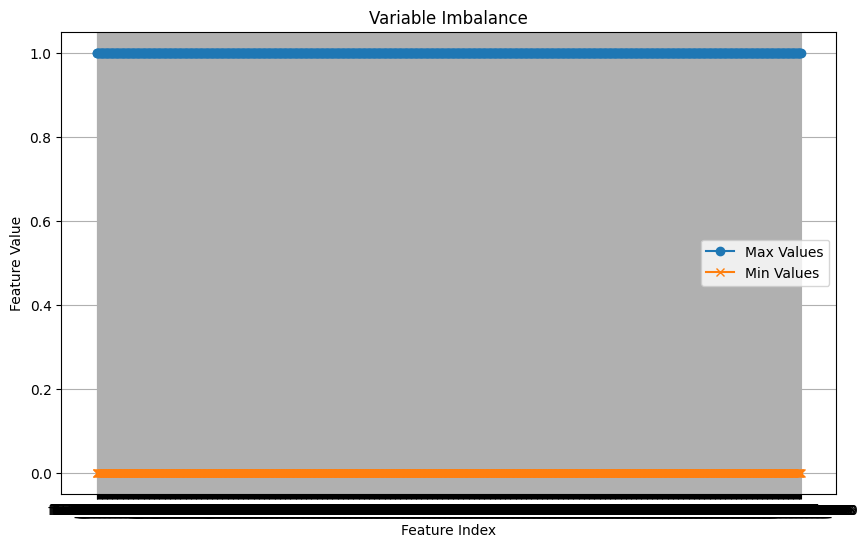

In [41]:
## Visualising the variable imbalance after upscaling

max_values = df_resampled_scaled.max()
min_values = df_resampled_scaled.min()
plt.figure(figsize=(10, 6))
plt.plot(max_values, label='Max Values', marker='o')
plt.plot(min_values, label='Min Values', marker='x')
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
plt.title('Variable Imbalance')
plt.legend()
plt.grid(True)
plt.show()



In [42]:
df_resampled_info_cluster.reset_index(drop= True, inplace = True)

# Merge df_resampled_info_cluster  with df_resampled_scaled on their indices with 'feat_esm1b_1' column serving as the key for merging

df_resampled_scaled_fic = pd.concat([ df_resampled_info_cluster , df_resampled_scaled], axis=1)


## Model Fitting with Evaluation Metrics


In [43]:
# Splitting the data for  preliminary testing 
gss_train_test = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=29)
gss_train_val = GroupShuffleSplit(n_splits=1, test_size=0.25, random_state=29)

X = df_resampled_scaled_fic.drop(columns=['Class'])
y = df_resampled_scaled_fic[['Class']]

for train_test_index, val_index in gss_train_test.split(X, y, groups=df_resampled_scaled_fic['Info_cluster']):
    X_train_test, X_val = X.iloc[train_test_index], X.iloc[val_index]
    y_train_test, y_val = y.iloc[train_test_index], y.iloc[val_index]

for train_index, test_index in gss_train_val.split(X_train_test, y_train_test, groups=df_resampled_scaled_fic.loc[X_train_test.index]['Info_cluster']):
    X_train, X_test = X_train_test.iloc[train_index], X_train_test.iloc[test_index]
    y_train, y_test = y_train_test.iloc[train_index], y_train_test.iloc[test_index]




In [44]:
# Suppressing FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)



In [45]:
# Logistic Regression

random_seed = 29
np.random.seed(random_seed)
l_model = LogisticRegression(max_iter=1000)
l_model.fit(X_train,np.ravel(y_train))
logistic_pred = l_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_pred)
logistic_balanced_accuracy = balanced_accuracy_score(np.ravel(y_test), logistic_pred)



print("Logistic Regression Accuracy:", logistic_accuracy)
print("Logistic Regression Balanced Accuracy:", logistic_balanced_accuracy)

Logistic Regression Accuracy: 0.6236276570894651
Logistic Regression Balanced Accuracy: 0.6724495389950473


In [46]:
# Suppressing Warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [47]:
# XGBoost

np.random.seed(random_seed)
y_train_encoded = (y_train + 1) // 2  
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train_encoded)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_balanced_accuracy = balanced_accuracy_score(y_test, xgb_pred)

print("XGBoost Classifier Accuracy:", xgb_accuracy)
print("XGBoost Balanced Accuracy:", xgb_balanced_accuracy)

XGBoost Classifier Accuracy: 0.14897220275636533
XGBoost Balanced Accuracy: 0.12853975612214047


/Users/pracyaim/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [48]:
#KNN

np.random.seed(random_seed)
classifier = KNeighborsClassifier(np.random.seed(random_seed))
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train.values.ravel())
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test.values.ravel(), knn_pred)
knn_balanced_accuracy = balanced_accuracy_score(y_test.values.ravel(), knn_pred)


mean_balanced_accuracy = (knn_accuracy + knn_accuracy) / 2
print("KNN Classifier Accuracy:", knn_accuracy)
print("KNN Classifier Balanced Accuracy:", knn_balanced_accuracy)

KNN Classifier Accuracy: 0.7116327960756833
KNN Classifier Balanced Accuracy: 0.7297754996489214


In [49]:
# Random Forest 

np.random.seed(random_seed)
rf_model = RandomForestClassifier(n_estimators=100, random_state=random_seed)
rf_model.fit(X_train, y_train.values.ravel())
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test.values.ravel(), rf_pred)
rf_balanced_accuracy = balanced_accuracy_score(y_test.values.ravel(), rf_pred)

print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Random Forest Classifier Balanced Accuracy:", rf_balanced_accuracy )

Random Forest Classifier Accuracy: 0.48750291987853306
Random Forest Classifier Balanced Accuracy: 0.5577950216668346


In [50]:
# DecisionTree

np.random.seed(random_seed)
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_balanced_accuracy = balanced_accuracy_score(y_test, dt_pred)

print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Balanced Accuracy:", dt_balanced_accuracy)

Decision Tree Accuracy: 0.5141906096706377
Decision Tree Balanced Accuracy: 0.5724226873267725


## Data Mining Pipeline Consolidation

In [51]:
#  preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=50)),
    ('scaler', StandardScaler())
])

In [52]:
# Using  Logistic Regression classifier


classifier1 = l_model

# Create full pipeline
pipeline_lr = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classifier', classifier1)
])

# hyperparameters grid for grid search
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 0.2, 10, 100, 1000],  # Regularisation parameter
    #'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # Solver parameter
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(pipeline_lr, param_grid, cv=5, scoring='balanced_accuracy')

# Fit grid search on training data
grid_search.fit(X_train, y_train.values.ravel())  # ravel() to convert y to 1D array

# Print best hyperparameters and corresponding balanced accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Train Balanced Accuracy:", grid_search.best_score_)

# Evaluate the model on the test set
y_pred = grid_search.predict(X_test)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Test Balanced Accuracy:", test_balanced_accuracy)




Best Hyperparameters: {'classifier__C': 0.2}
Train Balanced Accuracy: 0.9971406037418088
Test Balanced Accuracy: 0.6428331858966311


In [53]:
### Logistic Regression outperformed other models with the best hyperparameters, achieving high train and test balanced accuracies.

## Random Forest overfitted its training hence why it couldnt generalise well the test data.
It's been made a comment due to lengthy runtime but retained for potential future verification.

## Using  Random Forest Classifier

classifier_random_forest = RandomForestClassifier()

## Create full pipeline
pipeline_rf = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classifier', classifier_random_forest)
])

## Hyperparameters grid for grid search
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20],  # Maximum depth of the tree
}

## Perform grid search with 5-fold cross-validation
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='balanced_accuracy')

## Fit grid search on training data
grid_search_rf.fit(X_train, y_train.values.ravel())  # ravel() to convert y to 1D array

## Print best hyperparameters and corresponding balanced accuracy
print("Best Hyperparameters:", grid_search_rf.best_params_)
print("Train Balanced Accuracy:", grid_search_rf.best_score_)

## Evaluate the model on the test set
y_pred_rf = grid_search_rf.predict(X_test)
test_balanced_accuracy_rf = balanced_accuracy_score(y_test, y_pred_rf)
print("Test Balanced Accuracy:", test_balanced_accuracy_rf)

In [ ]:
# Using KNN classifier


classifier2 = KNeighborsClassifier()

# Create full pipeline
pipeline_knn = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classifier', classifier2)
])

# hyperparameters grid for grid search
param_grid = {
    'classifier__n_neighbors': [3, 5, 7],  # Number of neighbors
    'classifier__weights': ['uniform', 'distance'],  # Weight function
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(pipeline_knn, param_grid, cv=5, scoring='balanced_accuracy')

# Fit grid search on training data
grid_search.fit(X_train, y_train.values.ravel())  # ravel() to convert y to 1D array

# Print best hyperparameters and corresponding balanced accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Train Balanced Accuracy:", grid_search.best_score_)

# Evaluate the model on the test set
y_pred = grid_search.predict(X_test)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Test Balanced Accuracy:", test_balanced_accuracy)

### KNN achieved a high test balanced accuracy with optimal hyperparameters making it the second best of the three models.

In [ ]:
# Load the new CSV file
df_holdout = pd.read_csv('/Users/pracyaim/Desktop/understanding Data/Assignment/df_holdout.csv', sep=";")

# Drop the first 8 columns and the 'Class' column and unused feat columns for a new feature df
df_new_test = df_holdout.iloc[:, 9:299]

#Keep the  first 8 columns for a new info df
df_new_info= df_holdout.iloc[:, :9]


# Fit the best pipeline to the data(Logistic Regression)
pipeline_lr.fit(df_train_feat ,df_train_info_class['Class'])

# Fit the preprocessing pipeline to the data
preprocessing_pipeline.fit(df_new_test)

# Save the trained preprocessing pipeline
with open('trained_preprocessing_pipeline.pkl', 'wb') as file:
    pickle.dump(preprocessing_pipeline, file)

In [ ]:

# Load the trained pipeline
with open('trained_pipeline.pkl', 'rb') as file:
    preprocessing_pipeline = pickle.load(file)
    
np.random.seed(random_seed)
half_rows = len(df_new_test) // 2
df_new_test_half = df_new_test.iloc[:half_rows, :]
df_new_test_processed = preprocessing_pipeline.transform(df_new_test)

# Predict labels for the test data
predicted_labels = pipeline_lr.predict(df_new_test)

# Display the predicted labels
print("Predicted Labels:", predicted_labels)



### Predicted label count in percentage

In [ ]:
unique_labels, counts = np.unique(predicted_labels, return_counts=True)
total_samples = len(predicted_labels)

for label, count in zip(unique_labels, counts):
    percentage = (count / total_samples) * 100
    print(f"Label: {label}, Percentage: {percentage:.2f}%")





## Generation of predictions on holdout set

In [ ]:
# Create DataFrame with predictions
predictions_df = pd.DataFrame({
    'Info_PepID': df_new_info['Info_PepID'],
    'Info_pos': df_new_info['Info_pos'],
    'Prediction': predicted_labels,
})

# Save predictions to CSV
predictions_df.to_csv("predictions_holdout.csv", index=False)

df = pd.read_csv('/Users/pracyaim/Downloads/predictions_holdout.csv')

#### Checking the proportion of each Class within each 'Info_cluster' group
df = pd.read_csv('/Users/pracyaim/Downloads/predictions_holdout.csv')
class_balance = df.groupby('Info_PepID')['Prediction'].value_counts(normalize=True)

###  class balance 
print(class_balance)

### Count the number of unique class balances
num_unique_class_balances = class_balance.value_counts().shape[0]
print("Number of unique class balances:", num_unique_class_balances)

Checked for unique class balance in info columns in the 'predictions_holdout' dataframe, to analyse the variability in our class distributions across:

29  in 'Info_PepID' 

37 in 'Info_pos'




## References
1.	Anon. 2012. Two Recommended Solutions for Missing Data: Multiple Imputation and Maximum Likelihood. [online] The Analysis Factor. Available at: <https://www.theanalysisfactor.com/missing-data-two-recommended-solutions/> [Accessed 26 January 2022].
2.	Brusco, M.J., Shireman, E. and Steinley, D., 2017. A comparison of latent class, K-means, and K-median methods for clustering dichotomous data. Psychological Methods, 22(3), pp.563–580. https://doi.org/10.1037/met0000095.
3.	Potocnakova, L., Bhide, M. and Pulzova, L.B., 2016. An Introduction to B-Cell Epitope Mapping and In Silico Epitope Prediction. Journal of Immunology Research, 2016, pp.1–11. https://doi.org/10.1155/2016/6760830.
4.	Zakiah, A., 2020. Outlier Detection of Transaction Data Using DBSCAN Algorithm. International Journal of Psychosocial Rehabilitation, 24(02), pp.3232–3240. https://doi.org/10.37200/ijpr/v24i2/pr200632.